# Sympy Note
### This is my note for sympy(prepared for SPEIT innovation center) 
__author__ = "Lizhan Hong"
__version__ = "0.1.0"

首先，我们应该弄清楚关于sypy的一些事情。SymPy只是一个Python库，就像 NumPy ， Django ，甚至是Python标准库中的模块 sys 或 re . 这意味着SymPy不向Python语言添加任何内容。Python语言固有的局限性也是SymPy固有的。这也意味着sypy会尽可能地使用Python习惯用法，这使得那些已经熟悉Python编程的人可以轻松地使用sypy编程。作为一个简单的例子，SymPy使用Python语法来构建表达式。隐式乘法 3x 或 3 x )在Python中不允许，因此在SymPy中也不允许。倍增 3 和 x ，必须键入 3*x 与 *

## 符号

### 1.环境和基本配置
这个事实的一个结果是，SymPy可以用于任何Python可用的环境中。我们只需导入它，就像导入其他库一样：

In [16]:
from sympy import *

这会将SymPy中的所有函数和类导入到我们的交互式Python会话中。现在，假设我们开始计算。
### 2.常见误区

In [14]:
x + 1

NameError: name 'x' is not defined

哎呀！这里发生了什么事？我们试图使用变量 x 但它告诉我们 x 未定义。在Python中没有定义变量之前，它们是没有意义的。sympy也不例外。与许多符号操作系统不同，在SymPy中，变量不是自动定义的。为了定义变量，我们必须使用 symbols .


In [17]:
from sympy import *
x = symbols('x')
x+1

x + 1

symbols 获取由空格或逗号分隔的变量名字符串，并从中创建符号。然后我们可以将它们赋给变量名。稍后，我们将研究一些方便的方法来解决这个问题。现在，让我们定义最常见的变量名， x ， y 和 z ，供本节其余部分使用


In [18]:
x, y, z = symbols('x y z')

最后一点，我们注意到符号的名称和它分配给它的变量的名称不需要相互关联。

### 3.symbols 和 Symbol
+ Symbol 是sympy的一个类
+ symbols 是sympy的一个可以创建Symbol多个实例的函数

可以一次定义多个符号。 字符串包含以逗号或空格分隔的变量名称

In [19]:
symbols('A'), Symbol('A')

(A, A)

In [20]:
symbols('A B C'), Symbol('A B C')

((A, B, C), A B C)

### 符号运算


In [21]:
import math
math.sqrt(25)

5.0

In [22]:
math.sqrt(7)

2.6457513110645907

In [23]:
sqrt(7)

sqrt(7)

In [24]:
math.sqrt(12)


3.4641016151377544

In [25]:
sqrt(12)

2*sqrt(3)

In [26]:
from sympy import * 
x=Symbol ('x') 
expr = integrate(x**x, x) 
expr

Integral(x**x, x)

相当于
$\int \mathrm{x}^{x}\,\mathrm{d}x$

## 数字

### 浮点数:

In [27]:
Float(3.1419)

3.14190000000000

In [28]:
Float(10)

10.0000000000000

In [29]:
Float(1.333333, 2)

1.3

In [30]:
3/4

0.75

In [31]:
Rational(3/4)

3/4

### 整数

In [32]:
Integer(3.4), Integer(-1.6)

(3, -1)

## 符号类
### 一个符号可以有多个字母

In [33]:
a = Symbol('Apolloid')
a

Apolloid

在 SymPy 的 abc 模块中，所有拉丁字母和希腊字母都被定义为符号。 因此，这种方法不是实例化 Symbol 对象，很方便。


In [34]:
from sympy.abc import x,y,z
x, y, z

(x, y, z)

但是，名称C、O、S、I、N、E 和Q 是预定义的符号


In [35]:
from sympy.abc import _clash1, _clash2 
_clash1

{'O': '', 'Q': '', 'N': '', 'I': '', 'E': '', 'S': ''}

In [36]:
_clash2

{'beta': '', 'zeta': '', 'gamma': '', 'pi': ''}

生成式列表创建变量

In [37]:
s = symbols('x:5')
[s[_]+1 for _ in range(5)]

[x0 + 1, x1 + 1, x2 + 1, x3 + 1, x4 + 1]

In [38]:
symbols('apolloid(10:12)')

(apolloid10, apolloid11)

## 替换
要对数学表达式执行的最基本操作之一是替换。 SymPy 中的 subs() 函数用第二个参数替换所有出现的第一个参数。

In [39]:
x, a = symbols('x a')
f = cos(x)*cos(x) + sin(x)*sin(x)
f

sin(x)**2 + cos(x)**2

In [40]:
f.subs(x, a)

sin(a)**2 + cos(a)**2

In [41]:
f.subs(x, x+1)

sin(x + 1)**2 + cos(x + 1)**2

In [42]:
f.subs(x, f)

sin(sin(x)**2 + cos(x)**2)**2 + cos(sin(x)**2 + cos(x)**2)**2

In [43]:
f.subs(x, 1)

cos(1)**2 + sin(1)**2

In [44]:
f.subs(x, pi)

1

## Sympy() 函数

sympify() 函数用于转换任意表达式，使其可以用作 SymPy 表达式。 在 SymPy 中转换普通的 Python 对象，例如整数对象。 整数等，字符串也被转换为 SymPy 表达式。

In [45]:
f = 'sqrt(x) + 1'
f1 = simplify(f)
f2 = f1.subs(x, 5)
f2

1 + sqrt(5)

In [46]:
type(f), type(f1)

(str, sympy.core.add.Add)

In [47]:
simplify('5+16/4')

9

## evalf() 函数

此函数计算给定的数值表达式，最高可达 100 位的给定浮点精度。 该函数还采用 subs 参数，一个包含符号数值的字典对象。 考虑以下表达式

In [48]:
from sympy.abc import r
Area = pi * r**2
Area

pi*r**2

In [49]:
Area.evalf(subs={r:5})

78.5398163397448

In [50]:
Area.evalf(100, subs={r:5})

78.53981633974483096156608458198757210492923498437764552437361480769541015715522496570087063355292670

## lambdify() 函数

lambdify 函数将 SymPy 表达式转换为 Python 函数。 如果表达式要在大范围的值上求值，则 evalf() 函数效率不高。 lambdify 就像一个 lambda 函数，除了它将 SymPy 名称转换为给定数值库的名称，通常是 NumPy。 默认情况下，lambdify 用于数学标准库中的实现。

In [51]:
f = 1 / sin(x)
f1 = lambdify(x, f)
f1(3.14)


627.8831939138764

In [52]:
from sympy.abc import a, b
f = a**2 + b**2
f2 = lambdify([a,b], f, 'numpy')

但是，要利用 numpy 库作为数字后端，我们必须将其定义为 lambdify() 函数的参数。

In [53]:
import numpy as np
l1 = np.arange(1, 10, 2)
l2 = np.arange(0, 9, 2)
f2(l1, l2)

array([  1,  13,  41,  85, 145], dtype=int32)

## 逻辑表达式
布尔函数在 sympy.basic.booleanarg 模块 中定义。 可以使用标准 python 运算符 & (And), | (Or), ~ (Not) 以及 >> 和 << 构建布尔表达式。 布尔表达式继承自 SymPy 核心模块中定义的基本类。

In [54]:
x=sympify(true) 
x

True

In [55]:
x=sympify(false) 
x

False

详细内容见http://www.w3schools.cn/sympy/sympy_logical_expressions.html

## 查询

In [56]:
from sympy import * 
x=Symbol('x') 
x=10 
ask(Q.algebraic(pi))


False

In [57]:

ask(Q.complex(5-4*I)), ask( Q.complex(100))



(True, True)

In [58]:

x,y=symbols("x y") 
x,y=5,10 
ask(Q.composite(x)), ask(Q.composite(y))


(False, True)

In [59]:

ask(Q.even(x)), ask(Q.even(y))
(False, True)
x,y= 2*I, 4+5*I 
ask(Q.imaginary(x)), ask(Q.imaginary(y))


(True, False)

In [60]:

x,y=5,10 
ask(Q.even(x)), ask(Q.even(y)), ask(Q.odd(x)), ask(Q.odd(y))


(False, True, True, False)

In [61]:

x,y=5,-5 
ask(Q.positive(x)), ask(Q.negative(y)), ask(Q.positive(x)), ask(Q.negative(y))


(True, True, True, True)

In [62]:

ask(Q.rational(pi)), ask(Q.irrational(S(2)/3))


(False, False)

In [63]:

ask(Q.zero(oo)), ask(Q.nonzero(I))


(False, False)

## 简化函数

### expand()
 是 SymPy 中最常用的简化函数之一，用于展开多项式表达式。 例如 


In [64]:

a,b=symbols('a b') 
expand((a+b)**2)

a**2 + 2*a*b + b**2

### factor
此函数采用多项式并将其分解为有理数的不可约因子。

In [65]:
x,y,z=symbols('x y z') 
expr=(x**2*z + 4*x*y*z + 4*y**2*z) 
factor(expr)

z*(x + 2*y)**2

factor() 函数与 expand() 相反。 factor() 返回的每个因子都保证是不可约的。 factor_list() 函数返回更结构化的输出。


In [66]:

expr=(x**2*z + 4*x*y*z + 4*y**2*z) 
factor_list(expr)

(1, [(z, 1), (x + 2*y, 2)])

### collect
此函数收集关于表达式列表的表达式的附加项，直至具有有理指数的幂。


In [67]:

expr=x*y + x - 3 + 2*x**2 - z*x**2 + x**3 
expr

x**3 - x**2*z + 2*x**2 + x*y + x - 3


此表达式的 collect() 函数结果如下 


In [68]:
collect(expr,x)

x**3 + x**2*(2 - z) + x*(y + 1) - 3

In [69]:
collect(expr,y)

x**3 - x**2*z + 2*x**2 + x*y + x - 3

### cancel
cancel() 函数将采用任何有理函数并将其转化为标准规范形式 p/q，其中 p 和 q 是没有公因数的展开多项式。 p 和 q 的前导系数没有分母，即它们是整数。


In [70]:

expr1=x**2+2*x+1 
expr2=x+1 
cancel(expr1/expr2)

x + 1

### trigsimp
此函数用于简化三角恒等式。 可能会注意到，反三角函数的命名约定是在函数名称的前面附加一个 a。 例如，反余弦或反余弦称为 acos()。


In [71]:

from sympy import trigsimp, sin, cos 
from sympy.abc import x, y
expr = 2*sin(x)**2 + 2*cos(x)**2 
trigsimp(expr)

2

### powersimp
此函数通过将具有相似底数和指数的幂组合起来来减少给定的表达式。

In [72]:
expr = x**y*x**z*y**z
expr

x**y*x**z*y**z

In [73]:
powsimp(expr)

x**(y + z)*y**z

### combsimp
可以使用 combsimp() 函数简化涉及阶乘和二项式的组合表达式。 SymPy 提供了一个 factorial() 函数


In [74]:
expr=factorial(x)/factorial(x - 3) 
expr

factorial(x)/factorial(x - 3)

In [75]:
combsimp(expr)

x*(x - 2)*(x - 1)

### logcombine
此函数采用对数并使用以下规则组合它们 



+ log(x) + log(y) == log(x*y) if both are positive
+ a*log(x) == log(x**a) if x is positive and a is real


In [76]:
logcombine(a*log(x) + log(y) - log(z))

a*log(x) + log(y) - log(z)

In [77]:
logcombine(a*log(x) + log(y) - log(z), force=True)

log(x**a*y/z)

## 导数
函数的导数是其相对于其中一个变量的瞬时变化率。 这相当于求函数在一点的切线的斜率。我们可以使用 SymPy 包中的 diff() 函数以变量的形式求出数学表达式的微分。

In [78]:
f = x*sin(x**2) + 1
f

x*sin(x**2) + 1

In [79]:
diff(f, x), f.diff(x)

(2*x**2*cos(x**2) + sin(x**2), 2*x**2*cos(x**2) + sin(x**2))

In [80]:
f2 = exp(x**2)
f2, diff(f2, x)

(exp(x**2), 2*x*exp(x**2))

要进行多次导数，请根据需要多次传递变量以求微分，或者在变量后传递一个数字。

In [81]:
diff(x**4, x, 3)

24*x

In [82]:
for i in range(1,4): print (diff(x**4,x,i))

4*x**3
12*x**2
24*x


In [83]:
d = Derivative(f)
d

Derivative(x*sin(x**2) + 1, x)

In [84]:
d.doit()

2*x**2*cos(x**2) + sin(x**2)

## 积分
SymPy 包包含积分模块。 它实现了计算表达式的定积分和不定积分的方法。 integrate() 方法用于计算定积分和不定积分。 要计算不定积分或原始积分，只需在表达式后传递变量即可。


例如, 我举一个很有意思的积分, 做裂项, 拆分, 然后分部积分


In [85]:
f = 1/(1+ x**4)
integrate(f, x)

-sqrt(2)*log(x**2 - sqrt(2)*x + 1)/8 + sqrt(2)*log(x**2 + sqrt(2)*x + 1)/8 + sqrt(2)*atan(sqrt(2)*x - 1)/4 + sqrt(2)*atan(sqrt(2)*x + 1)/4

期末考试原题(误差函数)(多元积分可求解析解):

In [86]:
f_hamza = exp(-x**2)
integrate(f_hamza)

sqrt(pi)*erf(x)/2

In [87]:
integrate(f_hamza, (x, -oo, oo))

sqrt(pi)

In [88]:
integrate(f_hamza, (x, 0, oo))

sqrt(pi)/2

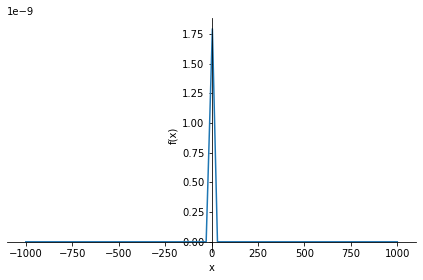

In [89]:
from sympy.plotting import plot
import matplotlib.pyplot as plt
plot(f_hamza, (x, -1000, 1000))

多元函数:

In [90]:
f_hamza2 = exp( - (x**2 + y**2) ) 
integrate(f_hamza2, (x, -oo, oo), (y, -oo, oo))

pi

### 积分变换
SymPy支持各种类型的积分变换如下



+ laplace_transform
+ fourier_transform
+ sine_transform
+ cosine_transform
+ hankel_transform
这些函数在 sympy.integrals.transforms 模块中定义。 以下示例分别计算傅立叶变换和拉普拉斯变换。



示例 1


In [91]:
from sympy.abc import x, k
expr=exp(-x**2) 
fourier_transform(expr, x, k)

sqrt(pi)*exp(-pi**2*k**2)

示例 2


In [92]:

from sympy.integrals import laplace_transform 
from sympy.abc import t, s, a 
laplace_transform(t**a, t, s)

(gamma(a + 1)/(s*s**a), 0, re(a) > -1)

## 矩阵

在数学中，矩阵是数字、符号或表达式的二维数组。 矩阵运算理论涉及对矩阵对象执行算术运算，并遵守一定的规则。

线性变换是矩阵的重要应用之一。 许多科学领域，特别是与物理学相关的领域都使用矩阵相关的应用程序。

SymPy 包有处理矩阵处理的矩阵模块。 它包括 Matrix 类，其对象表示一个矩阵。

注意：如果要单独执行本章所有的snippet，需要导入matrix模块，如下

In [93]:
from sympy.matrices import Matrix

In [94]:
m = Matrix([[1, 2], [3, 4]])
m

Matrix([
[1, 2],
[3, 4]])

In [95]:
M = Matrix(6, 6, [_ for _ in range(36)])
M

Matrix([
[ 0,  1,  2,  3,  4,  5],
[ 6,  7,  8,  9, 10, 11],
[12, 13, 14, 15, 16, 17],
[18, 19, 20, 21, 22, 23],
[24, 25, 26, 27, 28, 29],
[30, 31, 32, 33, 34, 35]])

In [96]:
M.shape

(6, 6)

In [97]:
M.row(0)

Matrix([[0, 1, 2, 3, 4, 5]])

In [98]:
M.col(3)

Matrix([
[ 3],
[ 9],
[15],
[21],
[27],
[33]])

In [99]:
# 切片
M.row(1)[1:3] 

[7, 8]

In [100]:
# 删除列或行
M.col_del(0)
M

Matrix([
[ 1,  2,  3,  4,  5],
[ 7,  8,  9, 10, 11],
[13, 14, 15, 16, 17],
[19, 20, 21, 22, 23],
[25, 26, 27, 28, 29],
[31, 32, 33, 34, 35]])

In [101]:
# 增加列或者行(拼接)
M1=Matrix([[1,2,3],[3,2,1]]) 
M2=Matrix([[4,5,6],[6,5,4]]) 
M1.row_join(M2) #增加列


Matrix([
[1, 2, 3, 4, 5, 6],
[3, 2, 1, 6, 5, 4]])

In [102]:

M1.col_join(M2) #增加行

Matrix([
[1, 2, 3],
[3, 2, 1],
[4, 5, 6],
[6, 5, 4]])

### 基本运算


In [103]:

M1=Matrix([[1,2,3],[3,2,1]]) 
M2=Matrix([[4,5,6],[6,5,4]]) 
M1+M2

Matrix([
[5, 7, 9],
[9, 7, 5]])

In [104]:
M1-M2

Matrix([
[-3, -3, -3],
[-3, -3, -3]])

In [105]:
M1 * M2.T

Matrix([
[32, 28],
[28, 32]])

In [106]:
M2 * M1.T

Matrix([
[32, 28],
[28, 32]])

In [107]:
# Determinant: 行列式
m = Matrix([[1, 2], [3, 4]])
m.det()

-2

In [108]:
# Dependant linaire:
m = Matrix([[1, 2], [2, 4]])
m.det()

0

In [109]:
### 特殊矩阵函数:


In [110]:
from sympy.matrices import *
eye(4)

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

In [111]:
zeros(4)

Matrix([
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0],
[0, 0, 0, 0]])

In [112]:
ones(4)

Matrix([
[1, 1, 1, 1],
[1, 1, 1, 1],
[1, 1, 1, 1],
[1, 1, 1, 1]])

## function 函数类
Sympy 包中有 Function 类，定义在 sympy.core.function 模块中。 它是所有应用数学函数的基类，也是未定义函数类的构造函数。

以下类别的函数继承自Function类 

+ 复数函数
+ 三角函数
+ 整数函数
+ 组合函数
+ 其他杂项函数

In [113]:
a = 5+3*I
re(a)

5

In [114]:
im(a)

3

### sign

此函数返回表达式的复数符号。

对于真实的表达方式，符号将是 

+ 如果表达式是正的为1
+ 如果表达式为零则为0
+ 如果表达式是否定的则为-1
+ 如果表达式是虚数，则返回的符号是 

   + I 如果 im(expression) 为正数
   + -I 如果 im(expression) 为负

In [115]:
sign(1.55), sign(-1), sign (-3*I), sign(I*2)

(1, -1, -I, I)

### 三角函数
SymPy 对所有三角比都有定义 - sin cos、tan 等及其反函数，如 asin、acos、atan 等。这些函数计算给定角度的相应值，以弧度表示。

In [116]:
sin(pi/2), cos(pi/4), tan(pi/6)

(1, sqrt(2)/2, sqrt(3)/3)

In [117]:
asin(1), acos(sqrt(2)/2), atan(sqrt(3)/3)

(pi/2, pi/4, pi/6)

### 整数函数
这是一组对整数执行各种操作的函数。



### ceiling

这是一个单变量函数，返回不小于其参数的最小整数值。 如果是复数，实部和虚部分别设置上限。


In [118]:

ceiling(pi), ceiling(Rational(20,3)), ceiling(2.6+3.3*I)


(4, 7, 3 + 4*I)


### floor

此函数返回不大于其参数的最大整数值。 对于复数，此函数也分别取实部和虚部的底数。


In [119]:
floor(pi), floor(Rational(100,6)), floor(6.3-5.9*I)



(3, 16, 6 - 6*I)


### frac

此函数表示 x 的小数部分。


In [120]:
frac(3.99), frac(Rational(10,3)), frac(10)

(0.990000000000000, 1/3, 0)

### 组合函数
组合学是一个数学领域，涉及有限或离散系统中的选择、排列和操作问题。

### factorial

阶乘在组合学中非常重要，它给出了排列 n 个对象的方式的数量。 它被象征性地表示为𝑥！ 此函数是非负整数上阶乘函数的实现，负整数的阶乘是复无穷大

In [121]:
factorial(x)

factorial(x)

In [122]:
factorial(5)

120

### 二项式
这个函数表示我们可以从 n 个元素的集合中选择 k 个元素的方式的数量。

In [123]:
binomial(x,y)

binomial(x, y)

In [124]:
binomial(4,2)

6

In [125]:
# the cols of Pascal
for i in range(5): print ([binomial(i,j) for j in range(i+1)])

[1]
[1, 1]
[1, 2, 1]
[1, 3, 3, 1]
[1, 4, 6, 4, 1]


### fibonacci

斐波那契数列是由初始项 F0=0、F1=1 和两项递归关系 Fn=Fn−1+Fn−2 定义的整数序列。


In [126]:

[fibonacci(x) for x in range(10)]

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

### 杂项函数

以下是一些常用函数的列表 

+ Min − 返回列表的最小值。 命名为 Min 是为了避免与内置函数 min 发生冲突。

+ Max − 返回列表的最大值。 它被命名为 Max 以避免与内置函数 max 冲突。

+ root − 返回 x 的 n 次方根。

+ sqrt − 返回 x 的主平方根。

+ cbrt − 此函数计算 x 的主立方根（x++Rational(1,3) 的快捷方式）

## 四元数
[http://www.w3schools.cn/sympy/sympy_quaternion.html]

## 求解器
由于符号 = 和 == 在 Python 中被定义为赋值和相等运算符，因此它们不能用于制定符号方程。 SymPy 提供了 Eq() 函数来建立方程。

In [127]:
Eq(x-y, 0)

Eq(x - y, 0)

In [128]:
# 有解
solveset(Eq(x**2-9,0), x)

{-3, 3}

In [129]:
# 无解
solveset(exp(x),x)

EmptySet

### 线性方程
我们必须使用 linsolve() 函数来求解线性方程。

In [130]:
from sympy import * 
x,y=symbols('x y') 
linsolve([Eq(x-y,4),Eq( x + y ,1) ], (x, y))

{(5/2, -3/2)}

In [131]:
# 矩阵形式的线性方程组
a,b=symbols('a b') 
a=Matrix([[1,-1],[1,1]]) 
b=Matrix([4,1]) 
linsolve([a,b], (x,y))

{(5/2, -3/2)}

### 非线性方程
为此，我们使用 nonlinsolve() 函数。 这个例子的方程式

In [132]:
a,b=symbols('a b') 
nonlinsolve([a**2 + a, a - b], [a, b])

{(-1, -1), (0, 0)}

### 微分方程
首先，通过将 cls=Function 传递给 symbols 函数来创建一个未定义的函数。 要求解微分方程，请使用 dsolve。

In [133]:
x=Symbol('x') 
f=symbols('f', cls=Function) 
f(x)


f(x)

In [134]:
f(x).diff(x)

Derivative(f(x), x)

In [135]:
# 一阶微分方程
# 一阶微分方程的求解    
eqn = Eq(f(x).diff(x)-f(x), sin(x))
eqn

Eq(-f(x) + Derivative(f(x), x), sin(x))

In [136]:
dsolve(eqn, f(x))


Eq(f(x), C1*exp(x) - sin(x)/2 - cos(x)/2)

## 绘图
SymPy 使用 Matplotlib 库作为后端来渲染数学函数的 2-D 和 3-D 图。 确保 Matplotlib 在当前的 Python 安装中可用。

绘图支持在 sympy.plotting 模块中定义。 绘图模块中存在以下功能 

+ plot − 2D 二维线图

+ plot3d − 3D 三维线图

+ plot_parametric − 2D 二维参数图

+ plot3d_parametric − 3D 三维参数图

plot() 函数返回 Plot 类的一个实例。 一个绘图图形可能有一个或多个 SymPy 表达式。 虽然它能够使用 Matplotlib 作为后端，但也可以使用其他后端，例如 texplot、pyglet 或 Google charts API。

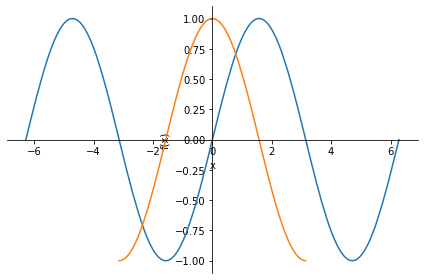

In [137]:
plot( (sin(x),(x, -2*pi, 2*pi)),(cos(x), (x, -pi, pi)))

可以在 plot() 函数中指定以下可选关键字参数。

+ line_color − 指定绘图线的颜色。

+ title − 要显示为标题的字符串

+ xlabel − 要显示为 X 轴标签的字符串

+ ylabel − 要显示为 y 轴标签的字符串

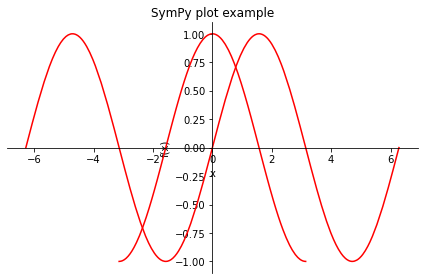

In [138]:
 plot( (sin(x),(x, -2*pi, 2*pi)),(cos(x), (x, -pi, pi)), line_color='red', title='SymPy plot example')

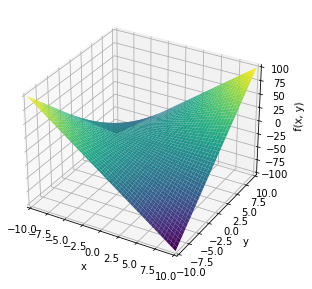

In [139]:
#3D图
from sympy.plotting import plot3d 
x,y=symbols('x y') 
plot3d(x*y, (x, -10,10), (y, -10,10))

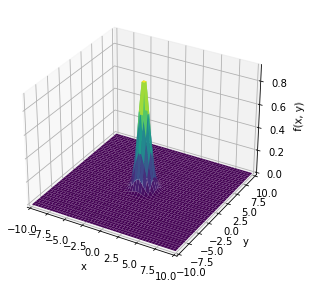

In [140]:
x,y=symbols('x y') 
plot3d(f_hamza2, (x, -10,10), (y, -10,10))

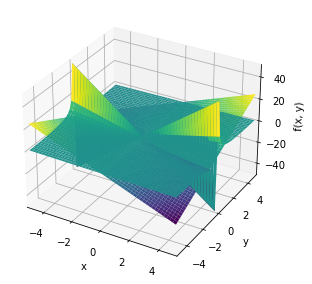

In [141]:
# plot multiple functions
plot3d(x*y, x/y, (x, -5, 5), (y, -5, 5))

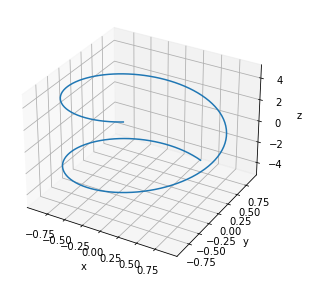

In [142]:
#3D parameteric plot
from sympy.plotting import plot3d_parametric_line 
plot3d_parametric_line(cos(x), sin(x), x, (x, -5, 5))

## 实体
SymPy 中的几何模块允许创建二维实体，例如线、圆等。然后我们可以获得有关它们的信息，例如检查共线性或查找交点。

### Point 点
Point 类表示欧几里得空间中的一个点。 下面的例子检查点的共线性

In [144]:
from sympy.geometry import Point 
x=Point(0,0) 
y=Point(2,2) 
z=Point(4,4) 
Point.is_collinear(x,y,z)

True


### Line 线
Line 实体是从两个Point 对象中获得的。 如果两条线相交，则 intersection() 方法返回交点。


In [146]:

from sympy.geometry import Point, Line 
p1, p2=Point(0,5), Point(5,0) 
l1=Line(p1,p2)
l2=Line(Point(0,0), Point(5,5)) 
l1.intersection(l2)

[Point2D(5/2, 5/2)]

## Triangle 三角形
此函数从三个点对象构建三角形实体。



Triangle(a,b,c)


In [150]:

t=Triangle(Point(0,0),Point(0,5), Point(5,0)) 
t.area

-25/2

### ellipse 椭圆
通过传递一个对应于中心的 Point 对象和两个分别代表水平和垂直半径的数字来构造椭圆几何实体。



ellipse(center, hradius, vradius)

In [153]:
from sympy.geometry import Ellipse, Line 
e=Ellipse(Point(0,0),8,3) 
e.area

24*pi

In [157]:
e.equation

<bound method Ellipse.equation of Ellipse(Point2D(0, 0), 8, 3)>

## 集合
在数学中，集合是明确定义的不同对象的集合，这些对象可以是数字、人、字母表中的字母，甚至是其他集合。 Set 也是 Python 中的内置类型之一。 SymPy 提供集合模块。 它包含不同类型集合的定义，并具有执行集合操作（如交集、并集等）的功能。

Set 是 SymPy 中任何其他类型集合的基类。 请注意，它不同于 Python 的内置集合数据类型。 Interval 类代表真实区间，其边界属性返回一个 FiniteSet 对象。


略


## 打印
SymPy 中有几种可用的打印机。 以下是部分清单 −

+ str
+ srepr
+ ASCII pretty printer
+ Unicode pretty printer
+ LaTeX
+ MathML
+ Dot
SymPy 对象也可以作为输出发送到各种语言的代码，例如 C、Fortran、Javascript、Theano 和 Python。

SymPy 使用 Unicode 字符以 pretty 的打印形式呈现输出。 如果您使用 Python 控制台执行 SymPy 会话，最好的 pretty 打印环境是通过调用 init_session() 函数激活的。